In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
!ls

 Beer_Dataset2.csv	     LightGBM.ipynb  'Random Forest.ipynb'
'Data Preprocessing.ipynb'   Presentation     XGBoost.ipynb
 LASSO.ipynb		    'Previous Work'   beer_ds.csv


In [3]:
beer = pd.read_csv("beer_ds.csv")

In [4]:
beer

,Sample,Is_QC,Class,0,1,2,3,4,5,6,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,14285,0,0,23503,19943,44285,21736,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,1,All,70286,168078,97993,125571,106607,140786,116265,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,0,Blonde,74725,97020,101905,129359,112249,144078,121089,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,0,Blonde,94139,177158,67187,141997,175515,50697,228039,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,1,Blonde,61199,169194,50003,131331,112077,145360,121956,...,0,0,5363,0,31380,8519,566,0,26585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,B_STU_QC,1,Stout,95728,0,0,28977,32366,25930,30662,...,0,0,27888,0,23537,6355,1795,6378,23963,0
67,B_Water,0,Water,5178,0,0,3533,9005,8202,3511,...,0,0,0,0,0,0,0,0,0,0
68,B_WHE_1,0,Wheat,76578,126048,81025,109281,96784,119715,103349,...,0,0,23226,0,902,2404,3128,7053,14421,4169
69,B_WHE_2,0,Wheat,65488,69649,75504,118129,102383,127892,110958,...,0,0,18736,0,1089,885,6292,0,13217,0


In [5]:
beer.isnull().sum()

Sample    0
Is_QC     0
Class     0
0         0
1         0
         ..
10810     0
10811     0
10812     0
10813     0
10814     0
Length: 10818, dtype: int64

In [6]:
beer.columns

Index(['Sample', 'Is_QC', 'Class', '0', '1', '2', '3', '4', '5', '6',
       ...
       '10805', '10806', '10807', '10808', '10809', '10810', '10811', '10812',
       '10813', '10814'],
      dtype='object', length=10818)

# Data Exploration and Normalization

Observing min and max feature values for each sample, the higher the feature value the more prevalent the feature is in this sample

In [7]:
#feature values (excluding the label and sample names)
feature_values = beer.iloc[:, 1:].values

# maximum value for each feature
max_feature_values = np.max(feature_values, axis=0)

# minimum value for each feature
min_feature_values = np.min(feature_values, axis=0)

result_df = pd.DataFrame({
    'Feature Index': range(1, len(max_feature_values) + 1),
    'Min Feature Value': min_feature_values,
    'Max Feature Value': max_feature_values})
print(result_df)


       Feature Index Min Feature Value Max Feature Value
0                  1                 0                 1
1                  2               All             Wheat
2                  3              5178            136549
3                  4                 0            263763
4                  5                 0            311865
...              ...               ...               ...
10812          10813                 0             37995
10813          10814                 0             27790
10814          10815                 0             39930
10815          10816                 0             93989
10816          10817                 0             38603

[10817 rows x 3 columns]


In [8]:
beer.index

RangeIndex(start=0, stop=71, step=1)

#  Normalizing Feature Values


In [9]:
#extracting only the feature columns (excluding the quality control column)
numeric_columns = beer.select_dtypes(include=['int64']).columns[1:]
X_features = beer[numeric_columns]
#apply z-score normalization
X_normalized = (X_features - X_features.mean()) / X_features.std()
#replacing original feature values with normalized values
beer[numeric_columns] = X_normalized

In [10]:
beer

,Sample,Is_QC,Class,0,1,2,3,4,5,6,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,-1.868298,-1.567441,-1.276954,-1.354611,-1.766998,-0.851681,-1.320698,...,-0.282863,0.410386,0.477931,-0.588307,0.801422,1.457427,1.709433,0.061105,1.176980,-0.182103
1,C_All_QC2,1,All,0.232623,1.416510,0.499485,0.090876,0.230586,0.379996,0.118426,...,-0.282863,0.299919,1.441388,-0.588307,0.377457,-0.396710,0.987809,0.506136,0.686011,-0.308890
2,C_BLD_1,0,Blonde,0.399156,0.154991,0.570403,0.144521,0.360633,0.422013,0.191867,...,0.548661,-0.370542,2.904191,-0.588307,-0.085898,0.690564,-0.606381,0.146028,1.261507,-0.106237
3,C_BLD_2,0,Blonde,1.127487,1.577711,-0.058973,0.323500,1.818899,-0.769842,1.820090,...,-0.282863,-0.370542,-1.393516,-0.588307,0.400206,-0.958002,-0.606381,-0.340864,-1.018912,-0.308890
4,C_BLD_QC,1,Blonde,-0.108283,1.436323,-0.370489,0.172449,0.356668,0.438375,0.205066,...,-0.282863,-0.370542,-1.015775,-0.588307,0.471666,-0.051387,-0.502321,-0.457354,0.664576,-0.308890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,B_STU_QC,1,Stout,1.187100,-1.567441,-1.276954,-1.277088,-1.480651,-1.085952,-1.184807,...,-0.282863,-0.370542,0.792261,-0.588307,0.058654,-0.298667,-0.276365,0.636866,0.496803,-0.308890
67,B_Water,0,Water,-2.209954,-1.567441,-1.276954,-1.637426,-2.019116,-1.312221,-1.598158,...,-0.282863,-0.370542,-1.446252,-0.588307,-1.180804,-1.024849,-0.606381,-0.457354,-1.036508,-0.308890
68,B_WHE_1,0,Wheat,0.468672,0.670336,0.191885,-0.139823,0.004168,0.111059,-0.078209,...,-0.282863,-0.370542,0.418051,-0.588307,-1.133305,-0.750146,-0.031289,0.752670,-0.113757,0.227190
69,B_WHE_2,0,Wheat,0.052622,-0.330936,0.091799,-0.014518,0.133224,0.215425,0.037631,...,-0.282863,-0.370542,0.057648,-0.588307,-1.123457,-0.923721,0.550423,-0.457354,-0.190797,-0.308890


In [11]:
# Removing 'Sample' column, it is not needed for this analysis
data_cleaned = beer.drop(['Sample'], axis=1)
missing_values = data_cleaned.isnull().sum().sum()
unique_classes = data_cleaned['Class'].unique()
qc_distribution = data_cleaned['Is_QC'].value_counts(normalize=True)
missing_values, unique_classes, qc_distribution

(0,
 array(['All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Water',
        'Wheat'], dtype=object),
 0    0.704225
 1    0.295775
 Name: Is_QC, dtype: float64)

In [12]:
# Exclude QC samples
data_no_qc = data_cleaned[data_cleaned['Is_QC'] == 0].drop('Is_QC', axis=1)

# exclude 'All' and 'Water' classes
data_final = data_no_qc[~data_no_qc['Class'].isin(['All', 'Water'])]

# Encode the 'Class' column using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_final['Class'] = le.fit_transform(data_final['Class'])

# Prepare features (X) and target (y) for model training
X = data_final.drop('Class', axis=1)
y = data_final['Class']



/tmp/ipykernel_377/500238848.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Class'] = le.fit_transform(data_final['Class'])


In [13]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features and the encoded classes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Class'] = y.reset_index(drop=True)  # Reset index for proper alignment

X_scaled_df.head(), le.classes_

(          0         1         2         3         4         5         6  \
 0  0.312622  0.096870  0.423271  0.044724  0.210874  0.273227  0.033626   
 1  1.098078  1.737023 -0.180330  0.261682  1.763597 -0.832383  1.573565   
 2  0.786064  1.531149  0.492031  0.056690  0.839194 -0.578621  1.139790   
 3  0.410814  1.696929  0.235504  0.099024  0.269532  0.304259  0.073222   
 4  1.197565  0.079842  4.073598  0.154594  0.391043  0.339553  0.132934   
 
           7         8         9  ...     10806     10807     10808     10809  \
 0  2.397515  0.786249  0.975973  ... -0.309446  2.824144 -0.676054 -0.062471   
 1  0.610166  1.784822  0.765930  ... -0.309446 -1.391050 -0.676054  0.411954   
 2 -0.801088  0.130902  1.056051  ... -0.309446  0.173883 -0.676054  0.316565   
 3  0.588754  2.517831  0.886464  ... -0.118015  1.362108 -0.676054  0.392269   
 4 -0.128945 -0.184968  1.010205  ... -0.309446  0.848021 -0.422719  0.168034   
 
       10810     10811     10812     10813     10814  

# L1 Regularization (LASSO)

/home/ayato/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.914e-02, tolerance: 1.253e-02
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.001
Number of selected features: 118
Total Variation Explained: 3.3366910125723197


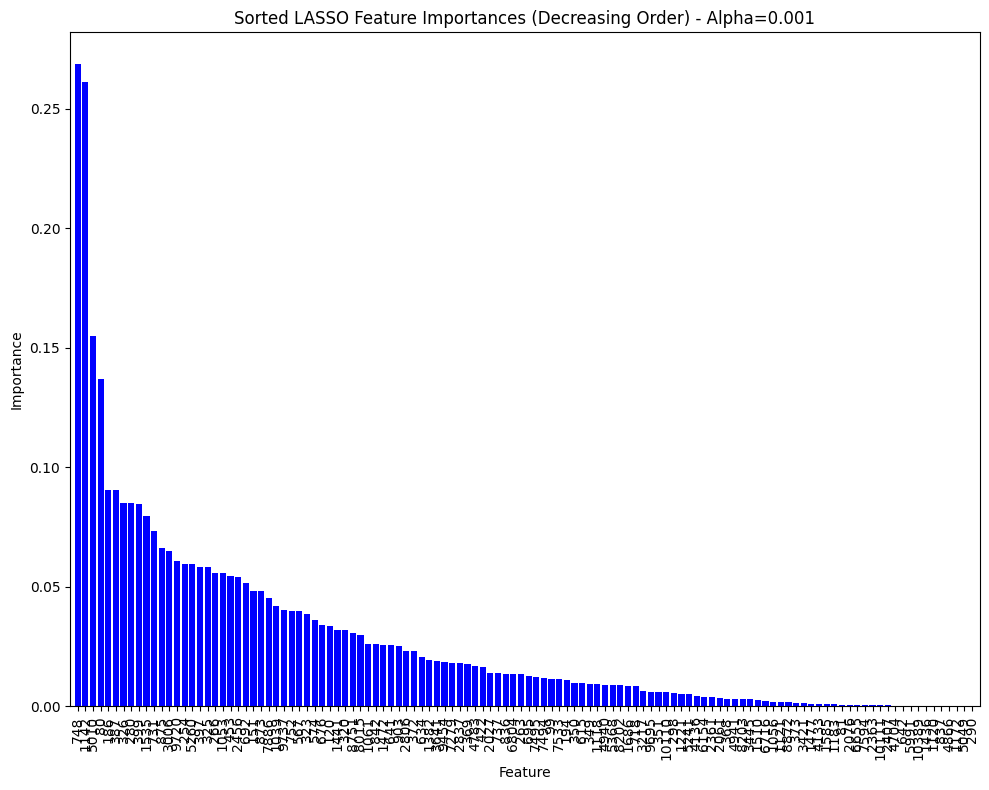

,Feature,Importance
0,748,0.268487
1,1142,0.260935
2,5010,0.154963
3,80,0.137065
4,186,0.090543
5,387,0.090535
6,326,0.085278
7,280,0.084932
8,399,0.084690
9,1535,0.079707


Alpha = 0.01
Number of selected features: 49
Total Variation Explained: 2.7248267173969762


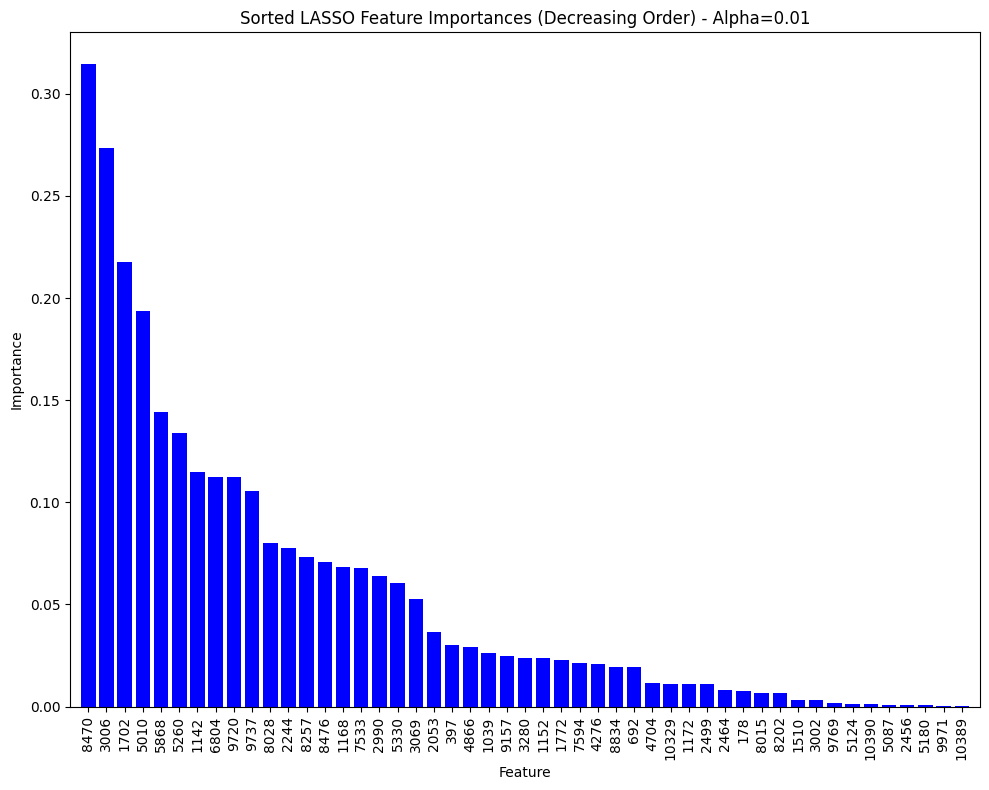

,Feature,Importance
0,8470,0.314380
1,3006,0.273658
2,1702,0.217879
3,5010,0.193601
4,5868,0.144413
5,5260,0.133880
6,1142,0.114738
7,6804,0.112540
8,9720,0.112334
9,9737,0.105629


Alpha = 0.1
Number of selected features: 28
Total Variation Explained: 2.2861226452775187


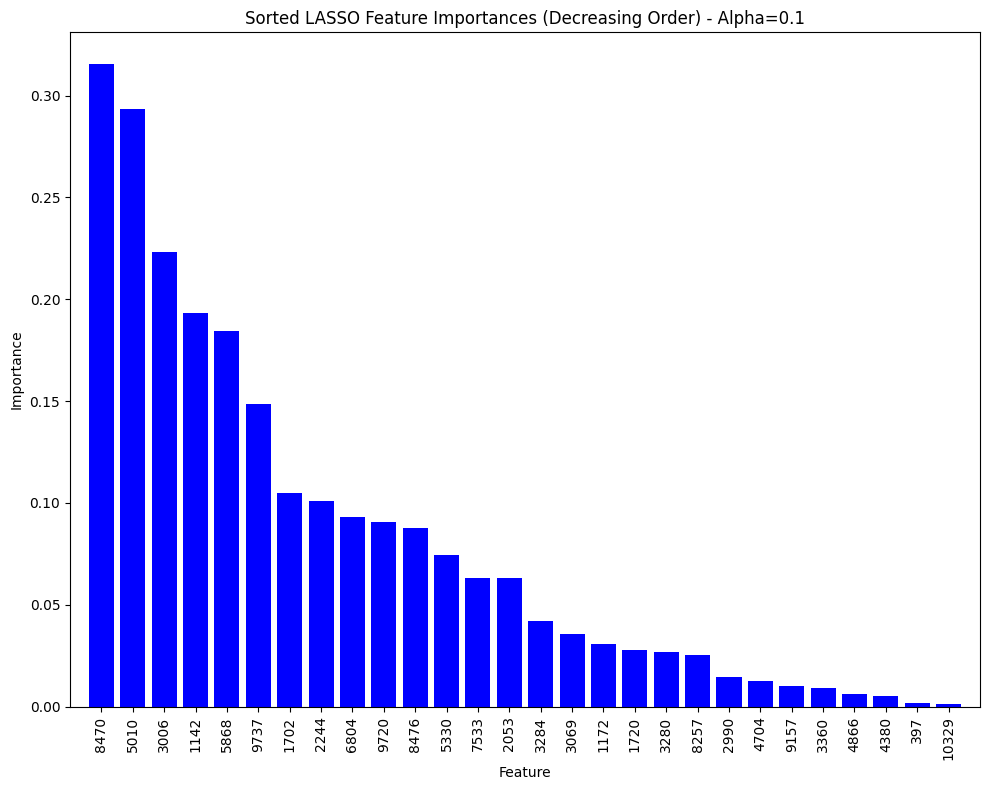

,Feature,Importance
0,8470,0.315266
1,5010,0.293459
2,3006,0.223100
3,1142,0.193152
4,5868,0.184557
5,9737,0.148837
6,1702,0.104885
7,2244,0.101051
8,6804,0.093295
9,9720,0.090915


Alpha = 1.0
Number of selected features: 3
Total Variation Explained: 0.3045414779061739


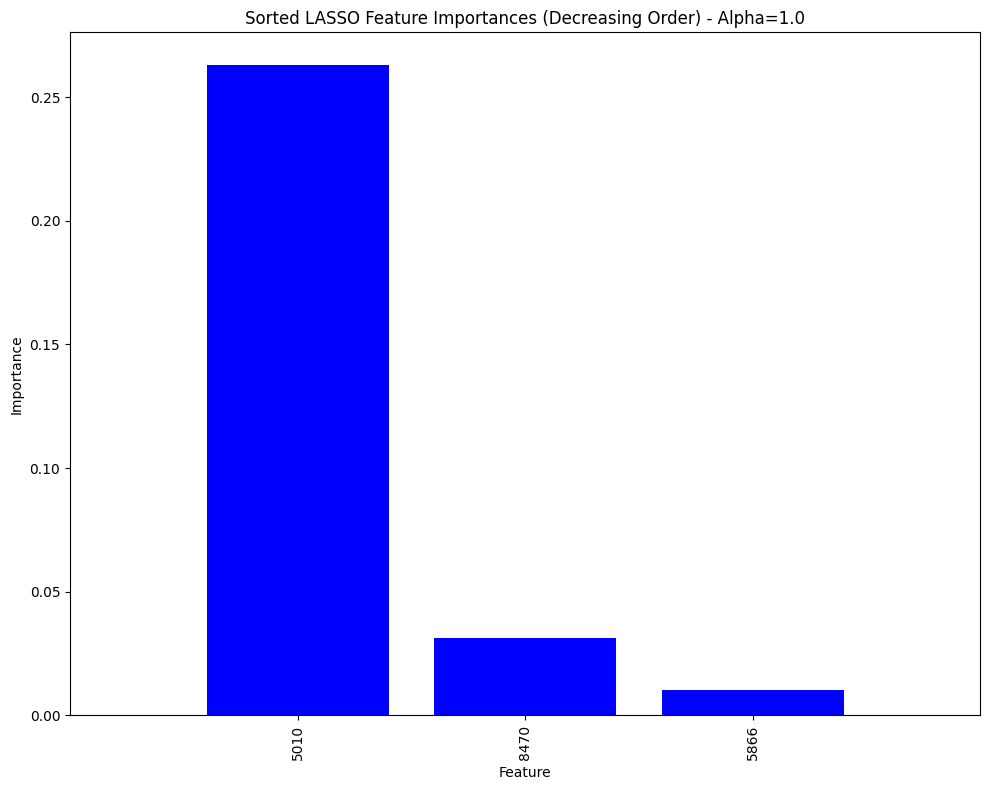

,Feature,Importance
0,5010,0.262997
1,8470,0.031435
2,5866,0.010109


Alpha = 10.0
Number of selected features: 0
Total Variation Explained: 0.0


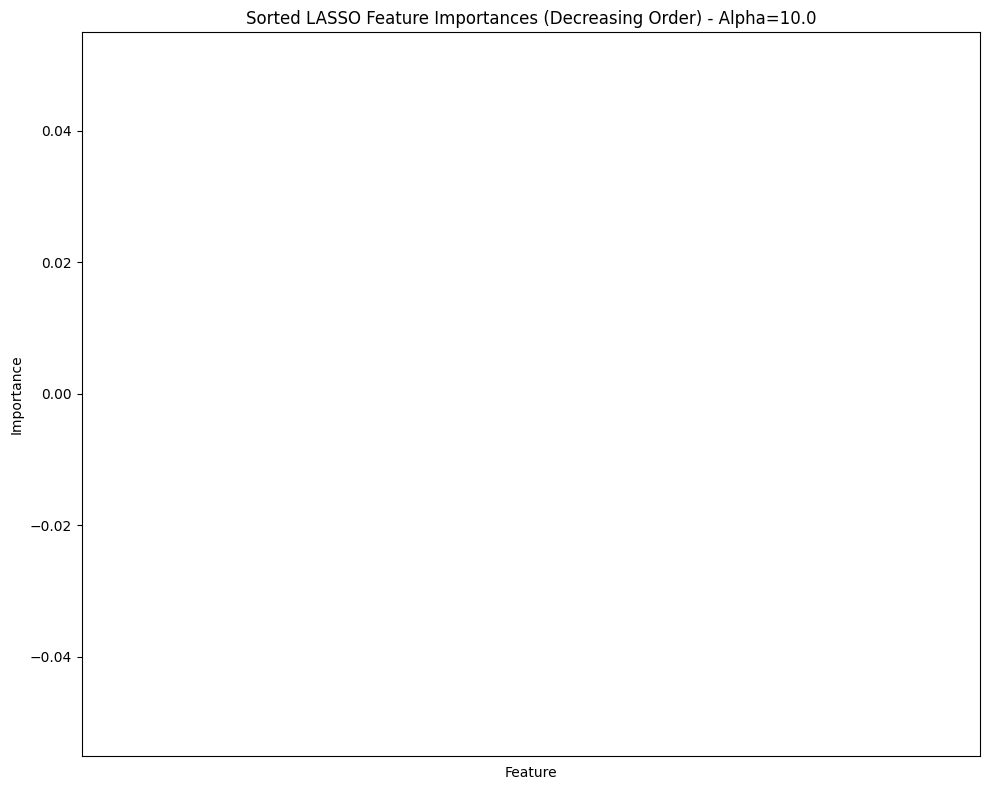

,Feature,Importance


In [14]:
from sklearn.linear_model import Lasso

# Specify the number of features (top 20)
k_features = 20

# Try different values for alpha to find a suitable balance
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

for alpha in alpha_values:
    # Train LASSO regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)

    # Get the indices of the selected features
    top_k_indices = np.where(lasso.coef_ != 0)[0]

    # Extract the top k features
    top_k_features_lasso = X.columns[top_k_indices]

    # Assuming you have already obtained the top_k_features_lasso and lasso model
    lasso_coefficients = lasso.coef_
    top_k_importances_lasso = np.abs(lasso_coefficients[top_k_indices])

    # Sort the LASSO features and importances in decreasing order
    sorted_indices_lasso = np.argsort(top_k_importances_lasso)[::-1]
    sorted_features_lasso = top_k_features_lasso[sorted_indices_lasso]
    sorted_importances_lasso = top_k_importances_lasso[sorted_indices_lasso]

    # Print number of selected features and total variation explained
    print(f"Alpha = {alpha}")
    print(f"Number of selected features: {len(top_k_features_lasso)}")
    print(f"Total Variation Explained: {np.sum(top_k_importances_lasso)}")

    # Plot the sorted LASSO feature importances
    plt.figure(figsize=(10, 8))
    plt.title(f'Sorted LASSO Feature Importances (Decreasing Order) - Alpha={alpha}')
    plt.bar(range(len(top_k_indices)), sorted_importances_lasso, color='b', align='center')
    plt.xticks(range(len(top_k_indices)), sorted_features_lasso, rotation=90)
    plt.xlim([-1, len(top_k_indices)])
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()

    # Display the top k features selected by LASSO in sorted order
    sorted_features_importances_lasso = pd.DataFrame({'Feature': sorted_features_lasso, 'Importance': sorted_importances_lasso})
    display(sorted_features_importances_lasso.head(k_features))


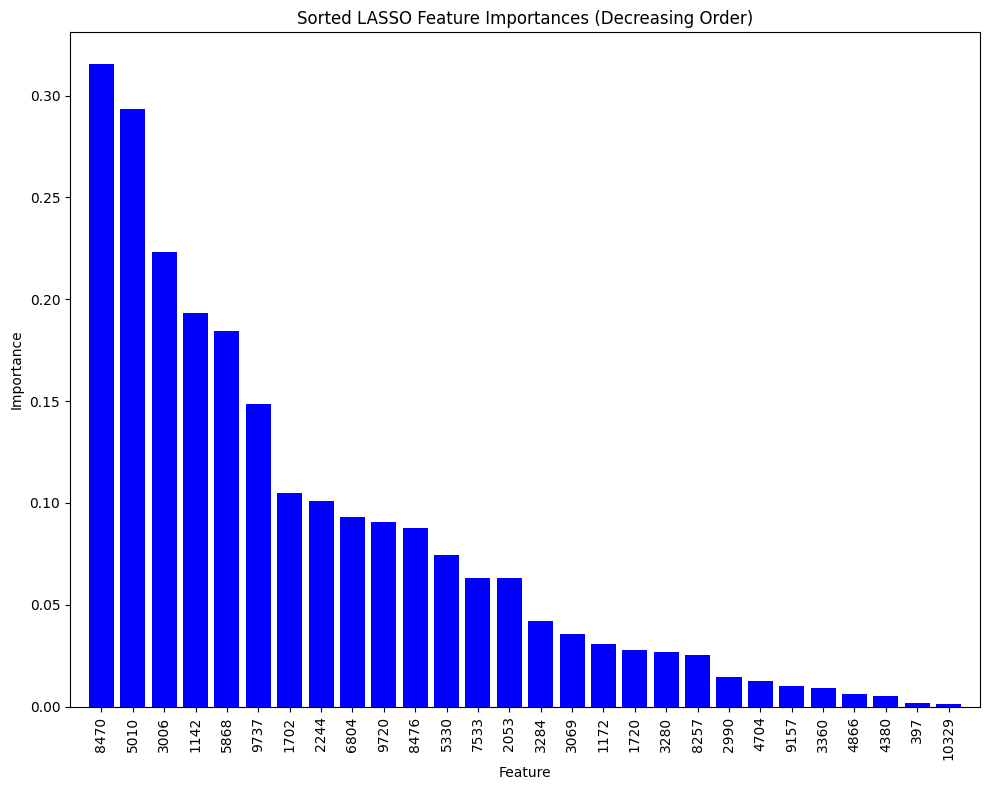

,Feature,Importance
0,8470,0.315266
1,5010,0.293459
2,3006,0.223100
3,1142,0.193152
4,5868,0.184557
5,9737,0.148837
6,1702,0.104885
7,2244,0.101051
8,6804,0.093295
9,9720,0.090915


In [15]:
from sklearn.linear_model import Lasso

# Specify the number of features you want (e.g., top 20)
k_features = 20

# Train LASSO regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_scaled, y)

# Get the indices of the selected features
top_k_indices = np.where(lasso.coef_ != 0)[0]

# Extract the top 20 features
top_20_features_lasso = X.columns[top_k_indices]
X_top_20_lasso = X[top_20_features_lasso]

# Assuming you have already obtained the top_20_features_lasso and lasso model
lasso_coefficients = lasso.coef_
top_20_importances_lasso = np.abs(lasso_coefficients[top_k_indices])

# Sort the LASSO features and importances in decreasing order
sorted_indices_lasso = np.argsort(top_20_importances_lasso)[::-1]
sorted_features_lasso = top_20_features_lasso[sorted_indices_lasso]
sorted_importances_lasso = top_20_importances_lasso[sorted_indices_lasso]

# Plot the sorted LASSO feature importances
plt.figure(figsize=(10, 8))
plt.title('Sorted LASSO Feature Importances (Decreasing Order)')
plt.bar(range(len(top_k_indices)), sorted_importances_lasso, color='b', align='center')
plt.xticks(range(len(top_k_indices)), sorted_features_lasso, rotation=90)
plt.xlim([-1, len(top_k_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 20 features selected by LASSO in sorted order
sorted_features_importances_lasso = pd.DataFrame({'Feature': sorted_features_lasso, 'Importance': sorted_importances_lasso})
sorted_features_importances_lasso


In [16]:
# Display the selected features
print("Selected Features using LASSO:")
print(top_20_features_lasso)

Selected Features using LASSO:
Index(['397', '1142', '1172', '1702', '1720', '2053', '2244', '2990', '3006',
       '3069', '3280', '3284', '3360', '4380', '4704', '4866', '5010', '5330',
       '5868', '6804', '7533', '8257', '8470', '8476', '9157', '9720', '9737',
       '10329'],
      dtype='object')


In [17]:
# Calculate the cumulative sum of LASSO feature importances for explanation
cumulative_importances_lasso = np.cumsum(sorted_importances_lasso)

# Calculate the total variation explained by the top 20 LASSO features
total_variation_explained_lasso = cumulative_importances_lasso[-1]

# Print the total variation explained by the top 20 LASSO features
print("Total Variation Explained (Top 20 LASSO Features):", total_variation_explained_lasso)


Total Variation Explained (Top 20 LASSO Features): 2.286122645277519


# Feature Visualization with t-SNE and PCA

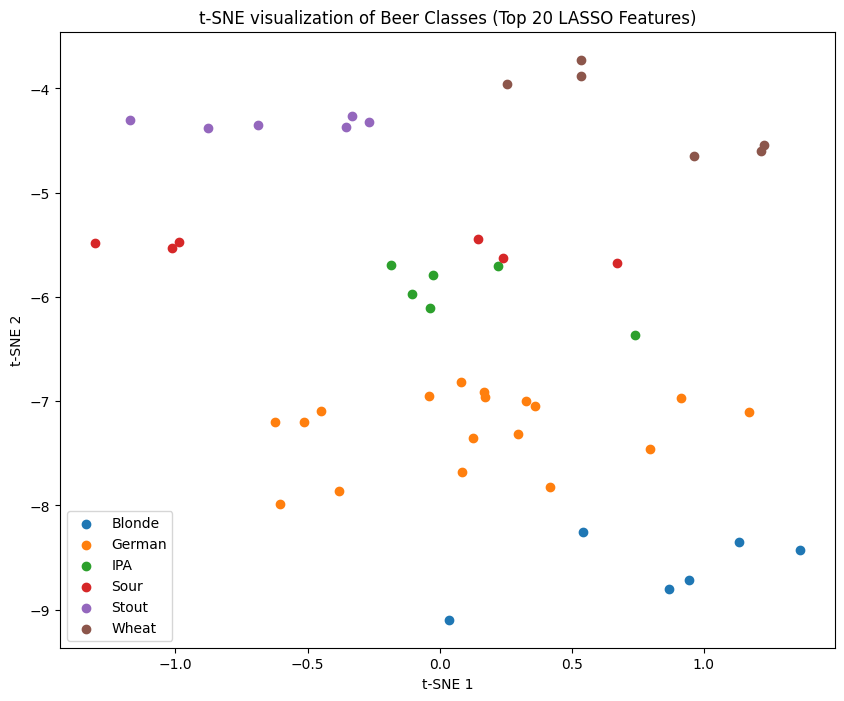

In [18]:
from sklearn.manifold import TSNE

# Check if the number of selected indices is less than the number of features
if len(top_k_indices) > X_scaled.shape[1]:
    raise ValueError("Number of selected indices exceeds the number of features.")

# Selecting only the top 20 features for t-SNE visualization from the LASSO-selected features
X_top_20_lasso = X_scaled[:, top_k_indices]

# Initialize and fit the t-SNE model
tsne = TSNE(n_components=2, random_state=42)
X_tsne_lasso = tsne.fit_transform(X_top_20_lasso)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_tsne_lasso[y == class_id, 0], X_tsne_lasso[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('t-SNE visualization of Beer Classes (Top 20 LASSO Features)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [19]:
from sklearn.decomposition import PCA

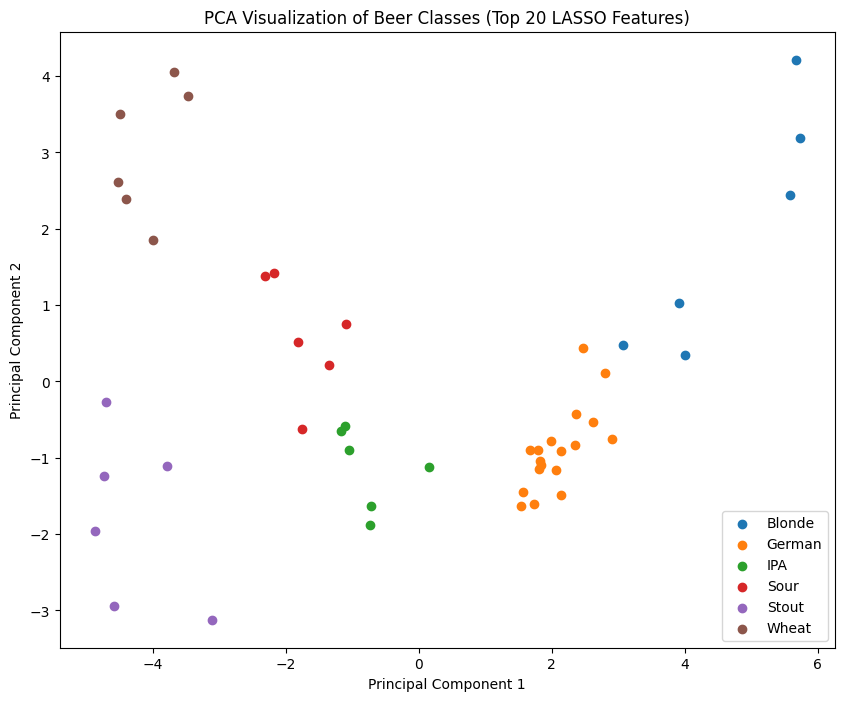

In [20]:
from sklearn.decomposition import PCA

# Check if the number of selected indices is less than the number of features
if len(top_k_indices) > X_scaled.shape[1]:
    raise ValueError("Number of selected indices exceeds the number of features.")

# Selecting only the top 20 features for PCA visualization from the LASSO-selected features
X_pca_top_20_lasso = X_scaled[:, top_k_indices]

# Initialize and fit the PCA model
pca = PCA(n_components=2, random_state=42)
X_pca_top_20_lasso = pca.fit_transform(X_pca_top_20_lasso)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_pca_top_20_lasso[y == class_id, 0], X_pca_top_20_lasso[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('PCA Visualization of Beer Classes (Top 20 LASSO Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/home/ayato/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.914e-02, tolerance: 1.253e-02
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.001
Number of selected features: 118
Total Variation Explained: 3.3366910125723197


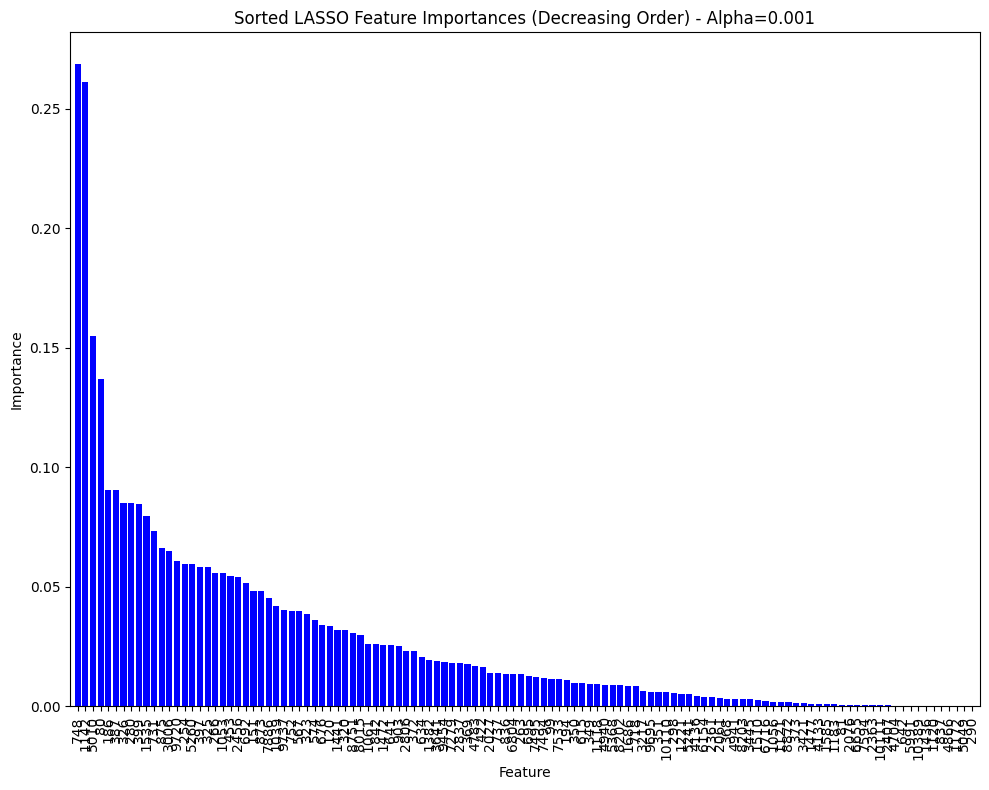

,Feature,Importance
0,748,0.268487
1,1142,0.260935
2,5010,0.154963
3,80,0.137065
4,186,0.090543
5,387,0.090535
6,326,0.085278
7,280,0.084932
8,399,0.084690
9,1535,0.079707


Alpha = 0.01
Number of selected features: 49
Total Variation Explained: 2.7248267173969762


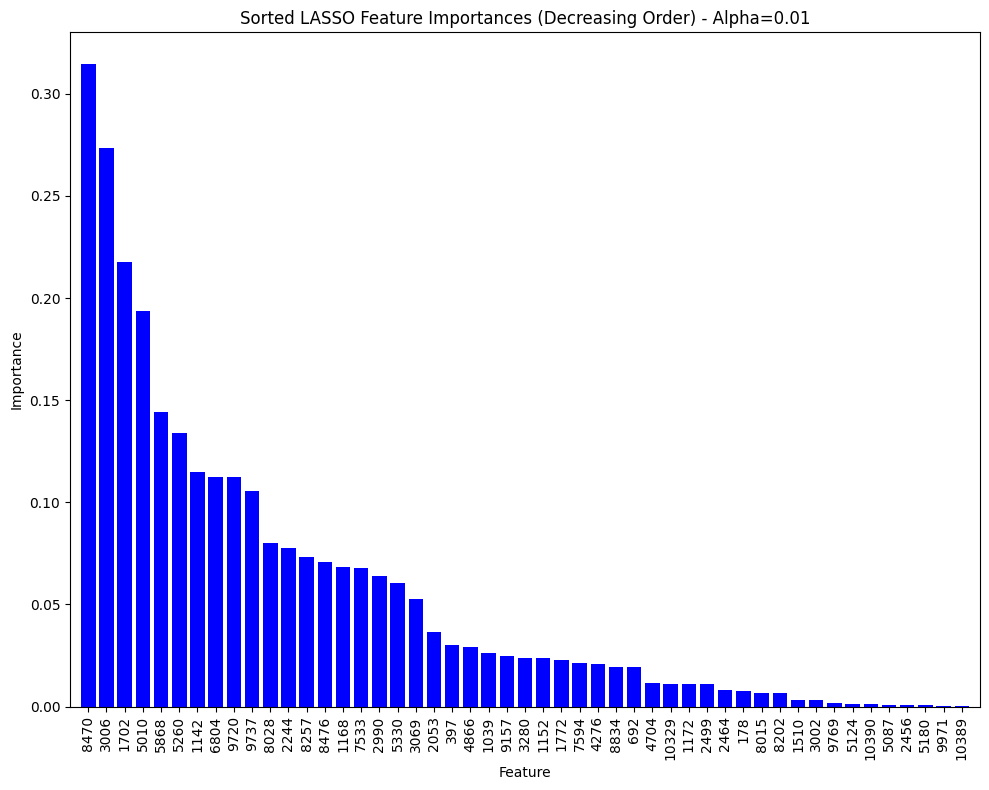

,Feature,Importance
0,8470,0.314380
1,3006,0.273658
2,1702,0.217879
3,5010,0.193601
4,5868,0.144413
5,5260,0.133880
6,1142,0.114738
7,6804,0.112540
8,9720,0.112334
9,9737,0.105629


Alpha = 0.1
Number of selected features: 28
Total Variation Explained: 2.2861226452775187


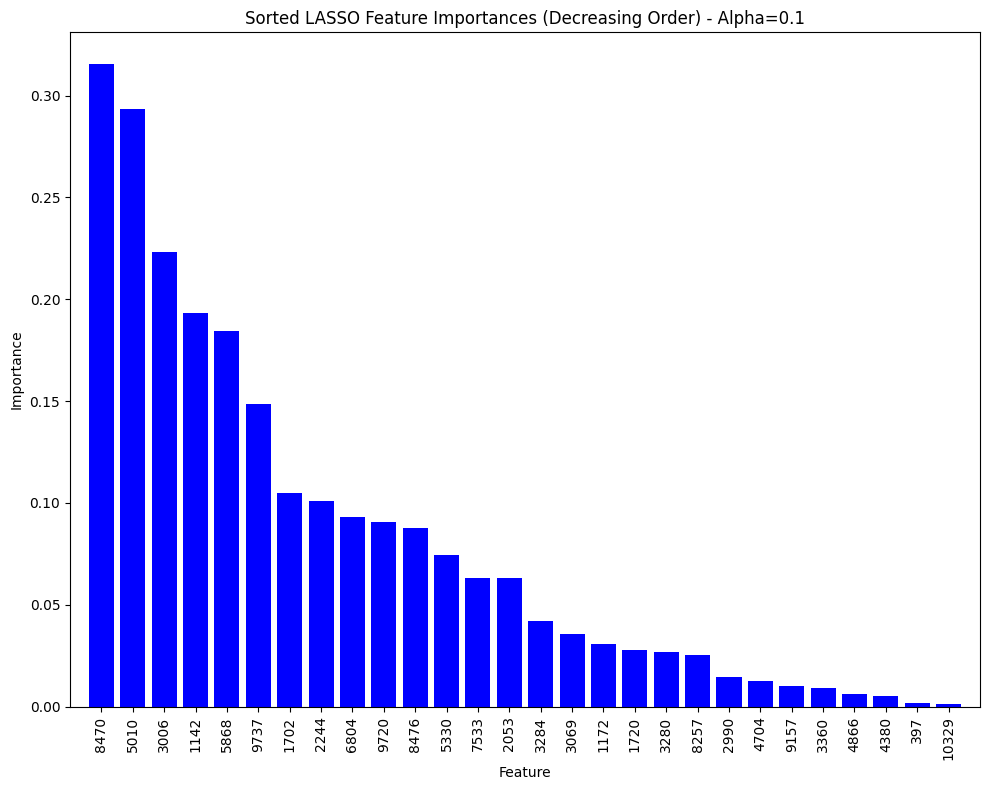

,Feature,Importance
0,8470,0.315266
1,5010,0.293459
2,3006,0.223100
3,1142,0.193152
4,5868,0.184557
5,9737,0.148837
6,1702,0.104885
7,2244,0.101051
8,6804,0.093295
9,9720,0.090915


Alpha = 1.0
Number of selected features: 3
Total Variation Explained: 0.3045414779061739


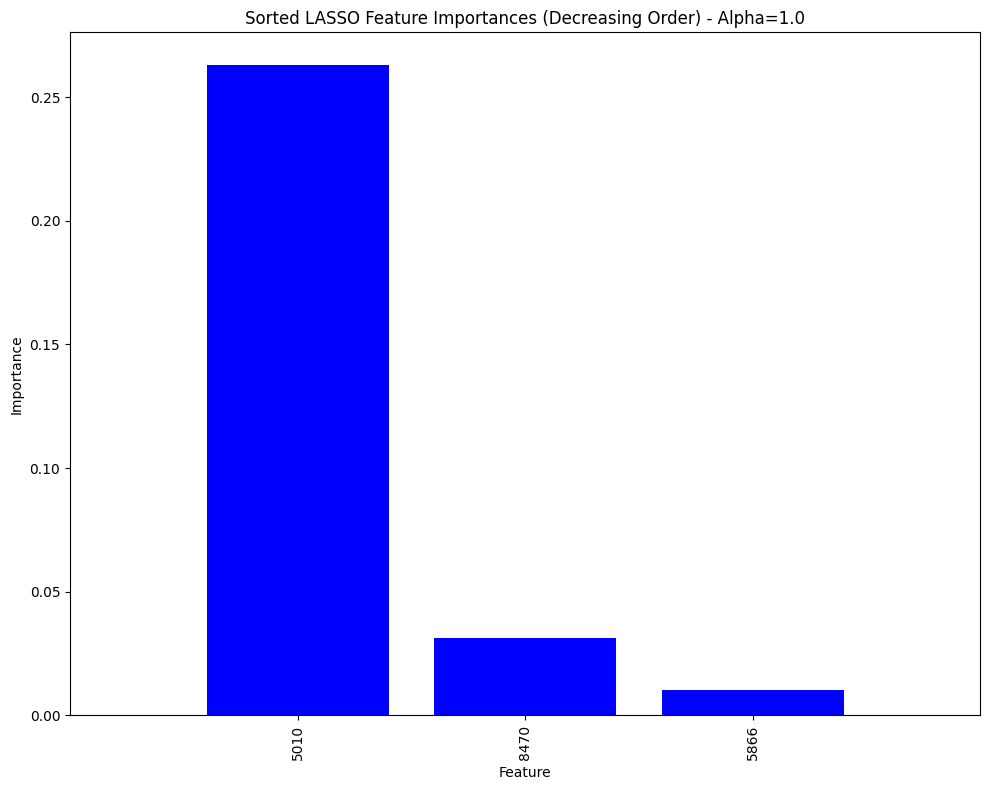

,Feature,Importance
0,5010,0.262997
1,8470,0.031435
2,5866,0.010109


Alpha = 10.0
Number of selected features: 0
Total Variation Explained: 0.0


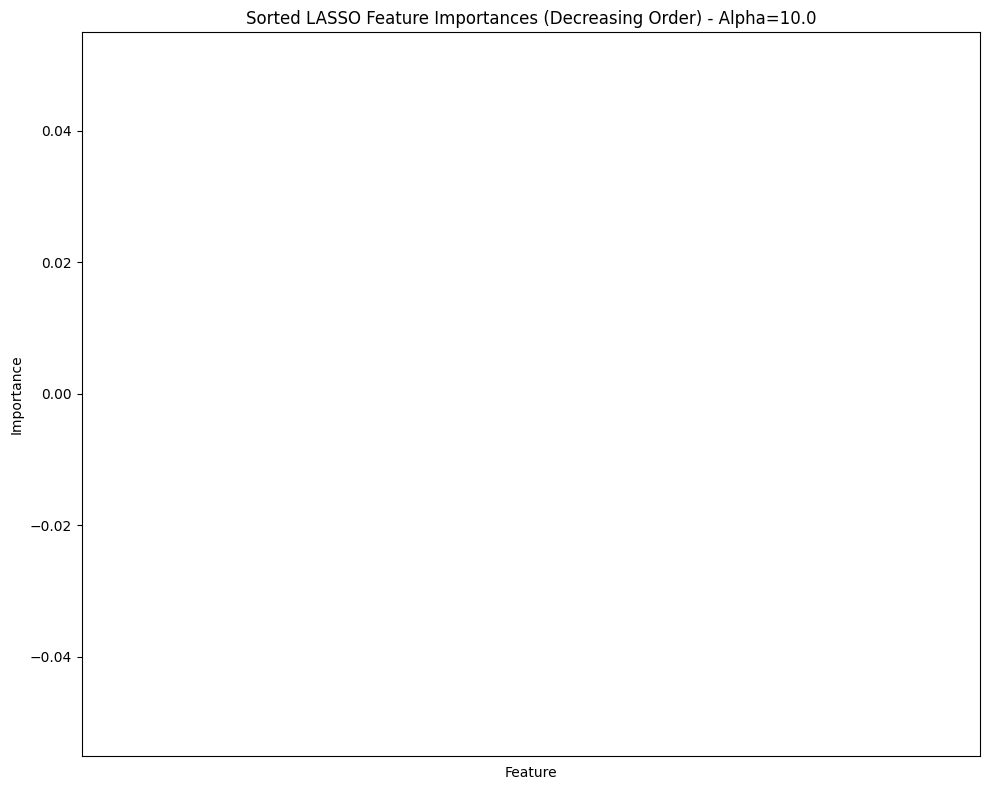

,Feature,Importance


In [21]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specify the number of features you want (e.g., top 20)
k_features = 20

# Define the alpha values to be tested (regularization parameter)
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]  # Adjust as needed

# Initialize lists to store results
cv_scores_mean = []
cv_scores_std = []

# Iterate over alpha values
for alpha in alpha_values:
    # Train LASSO regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)

    # Get the indices of the selected features
    top_k_indices = np.where(lasso.coef_ != 0)[0]

    # Extract the top k features
    top_k_features_lasso = X.columns[top_k_indices]

    # Assuming you have already obtained the top_k_features_lasso and lasso model
    lasso_coefficients = lasso.coef_
    top_k_importances_lasso = np.abs(lasso_coefficients[top_k_indices])

    # Sort the LASSO features and importances in decreasing order
    sorted_indices_lasso = np.argsort(top_k_importances_lasso)[::-1]
    sorted_features_lasso = top_k_features_lasso[sorted_indices_lasso]
    sorted_importances_lasso = top_k_importances_lasso[sorted_indices_lasso]

    # Print number of selected features and total variation explained
    print(f"Alpha = {alpha}")
    print(f"Number of selected features: {len(top_k_features_lasso)}")
    print(f"Total Variation Explained: {np.sum(top_k_importances_lasso)}")

    # Plot the sorted LASSO feature importances
    plt.figure(figsize=(10, 8))
    plt.title(f'Sorted LASSO Feature Importances (Decreasing Order) - Alpha={alpha}')
    plt.bar(range(len(top_k_indices)), sorted_importances_lasso, color='b', align='center')
    plt.xticks(range(len(top_k_indices)), sorted_features_lasso, rotation=90)
    plt.xlim([-1, len(top_k_indices)])
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()

    # Display the top k features selected by LASSO in sorted order
    sorted_features_importances_lasso = pd.DataFrame({'Feature': sorted_features_lasso, 'Importance': sorted_importances_lasso})
    display(sorted_features_importances_lasso.head(k_features))
